# Linear Regression
- Attempts to establish how X cause Y

## Correlation vs Linear Regression
__Similarities__
- Quantify the direction and strength of the relationship

## Differences 
- Correlation is a single statistic 
- Linear Regression produces an eqution

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


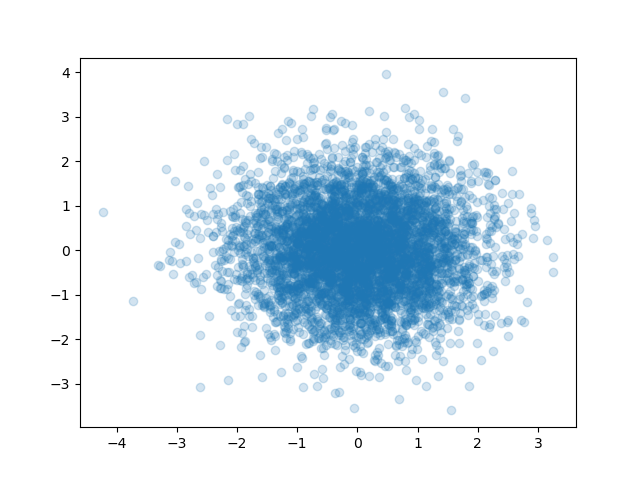

In [20]:
X = np.random.randn(5000)
Y = np.random.randn(5000)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=.2)


In [25]:
import pandas_datareader.data as pdr
import yfinance as yf 
yf.pdr_override()
from datetime import datetime
data = pdr.get_data_yahoo('^GSPC', datetime(1970, 1, 1))

[*********************100%***********************]  1 of 1 completed


In [27]:
tickers = ['AAPL', 'TWTR', 'IBM', 'MSFT', '^GSPC']
start = dt.datetime(2020, 1, 1)
data = pdr.get_data_yahoo(tickers, start)

[*********************100%***********************]  5 of 5 completed

1 Failed download:
- TWTR: No timezone found, symbol may be delisted


In [28]:
data = data['Adj Close']


In [29]:
data.head()


,AAPL,IBM,MSFT,TWTR,^GSPC
Date,,,,,
2020-01-02 00:00:00,73.449409,110.232506,155.761826,NaN,3257.850098
2020-01-03 00:00:00,72.735313,109.353386,153.822266,NaN,3234.850098
2020-01-06 00:00:00,73.314880,109.158020,154.219910,NaN,3246.280029
2020-01-07 00:00:00,72.970078,109.231262,152.813751,NaN,3237.179932
2020-01-08 00:00:00,74.143906,110.142967,155.247833,NaN,3253.050049


In [32]:
log_returns = np.log(data/data.shift())

In [33]:
log_returns


,AAPL,IBM,MSFT,TWTR,^GSPC
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.008007,-0.012530,NaN,-0.007085
2020-01-06,0.007937,-0.001788,0.002582,NaN,0.003527
2020-01-07,-0.004714,0.000671,-0.009160,NaN,-0.002807
2020-01-08,0.015958,0.008312,0.015803,NaN,0.004890
...,...,...,...,...,...
2023-04-14,-0.002116,0.001875,-0.012848,NaN,-0.002072
2023-04-17,0.000121,-0.002500,0.009253,NaN,0.003301
2023-04-18,0.007477,-0.000313,-0.001490,NaN,0.000855


In [34]:
def linear_regression(ticker_a, ticker_b):
    X = log_returns[ticker_a].iloc[1:].to_numpy().reshape(-1, 1)
    Y = log_returns[ticker_b].iloc[1:].to_numpy().reshape(-1, 1)

    lin_regr = LinearRegression()
    lin_regr.fit(X, Y)

    Y_pred = lin_regr.predict(X)

    alpha = lin_regr.intercept_[0]
    beta = lin_regr.coef_[0, 0]

    fig, ax = plt.subplots()
    ax.set_title("Alpha: " + str(round(alpha, 5)) + ", Beta: " + str(round(beta, 3)))
    ax.scatter(X, Y)
    ax.plot(X, Y_pred, c='r')

<IPython.core.display.Javascript object>


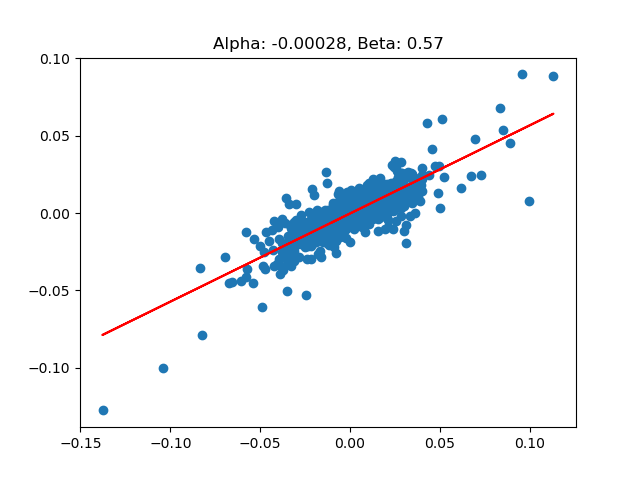

In [35]:
linear_regression("AAPL", "^GSPC")


<IPython.core.display.Javascript object>


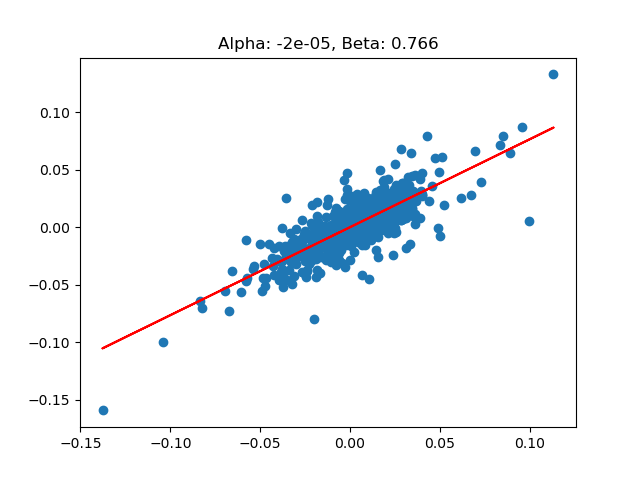

In [36]:
linear_regression("AAPL", "MSFT")
